Mean Squared Error: 898.6690369937877


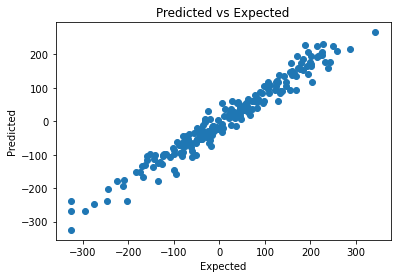

In [7]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate a random dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Convert the generated data to a DataFrame
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df["target"] = y

# Split the data into train and test sets
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set up the LightGBM parameters
params = {
    "objective": "regression",
    "metric": "mse",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "verbose":-1
}

# Train the model with early stopping
num_round = 1000
cv_results = lgb.cv(
    params,
    train_data,
    num_boost_round=num_round,
    nfold=5,
    early_stopping_rounds=10,
    stratified=False,
    verbose_eval = False
)

# Get the best number of rounds
best_round = len(cv_results["l2-mean"])

# Train the model with the best number of rounds
model = lgb.train(params, train_data, num_boost_round=best_round, verbose_eval = False)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the predicted vs expected scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Predicted vs Expected")
plt.show()